In [1]:
#Importing all needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importinf dataset
df1 = pd.read_csv('police_department_data.csv')
df1.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,29/01/2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",29/01/2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,25/04/2016 14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,1.410590e+13,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,05/01/2016 23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,1.600140e+13,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,01/01/2016 00:30,MISSION,NONE,16TH ST / MISSION ST,1.600030e+13,"(37.7650501214668, -122.419671780296)"


In [3]:
#Shape of dataset in rows and columns
df1.shape

(150500, 9)

In [4]:
df1.head(10)

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,29/01/2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",29/01/2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,25/04/2016 14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,1.410590e+13,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,05/01/2016 23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,1.600140e+13,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,01/01/2016 00:30,MISSION,NONE,16TH ST / MISSION ST,1.600030e+13,"(37.7650501214668, -122.419671780296)"
5,160002869,ASSAULT,BATTERY,01/01/2016 21:35,NORTHERN,NONE,1700 Block of BUSH ST,1.600030e+13,"(37.788018555829, -122.426077177375)"
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,02/01/2016 00:04,SOUTHERN,"ARREST, BOOKED",MARY ST / HOWARD ST,1.600030e+13,"(37.7808789360214, -122.405721454567)"
7,160003259,NON-CRIMINAL,FIRE REPORT,02/01/2016 01:02,TENDERLOIN,NONE,200 Block of EDDY ST,1.600030e+13,"(37.7839805592634, -122.411778295992)"
8,160003970,WARRANTS,WARRANT ARREST,02/01/2016 12:21,SOUTHERN,"ARREST, BOOKED",4TH ST / BERRY ST,1.600040e+13,"(37.7757876218293, -122.393357241451)"
9,160003641,MISSING PERSON,FOUND PERSON,01/01/2016 10:06,BAYVIEW,NONE,100 Block of CAMERON WY,1.600040e+13,"(37.7209669615499, -122.387181635995)"


In [5]:
#Checking how many null values are present in the data.
df1.isnull().sum(0)

incident_id            0
category               0
crime_description      0
crime_date             0
department_district    1
resolution             0
address                0
department_id          0
location               0
dtype: int64

In [6]:
#Droping all null values from the data.
df2 = df1.dropna()
df2.isnull().sum()

incident_id            0
category               0
crime_description      0
crime_date             0
department_district    0
resolution             0
address                0
department_id          0
location               0
dtype: int64

In [7]:
df2.shape

(150499, 9)

In [8]:
#To check duplicates in table
df2[df2.duplicated()].head(5)

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
6820,160251254,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,26/03/2016 16:59,SOUTHERN,JUVENILE BOOKED,800 Block of MARKET ST,1.602510e+13,"(37.7841893501425, -122.407633520742)"
25853,160112361,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,07/02/2016 00:01,SOUTHERN,NONE,500 Block of HOWARD ST,1.601120e+13,"(37.7878246694374, -122.397032436528)"
31759,160208584,LARCENY/THEFT,GRAND THEFT FROM PERSON,11/03/2016 19:45,TARAVAL,"ARREST, BOOKED",0 Block of BRIGHTON AV,1.602090e+13,"(37.7191534375561, -122.45518407114)"
46070,160441524,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,30/05/2016 11:50,PARK,NONE,1000 Block of FULTON ST,1.604420e+13,"(37.777329275022, -122.434046062672)"
51769,160536288,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,02/07/2016 15:04,MISSION,"ARREST, BOOKED",1900 Block of MISSION ST,1.605360e+13,"(37.7658510977435, -122.41967661615)"


In [9]:
#Deleting duplicate rows 
df3 = df2.drop_duplicates()
df3

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,29/01/2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",29/01/2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,25/04/2016 14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,1.410590e+13,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,05/01/2016 23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,1.600140e+13,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,01/01/2016 00:30,MISSION,NONE,16TH ST / MISSION ST,1.600030e+13,"(37.7650501214668, -122.419671780296)"
...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,30/12/2016 21:01,PARK,NONE,OAK ST / STANYAN ST,1.610610e+13,"(37.7714278595913, -122.453981622365)"
150496,176000742,NON-CRIMINAL,LOST PROPERTY,30/12/2016 08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,1.760010e+13,"(37.7966261239618, -122.401857374739)"
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,29/12/2016 20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,1.760010e+13,"(37.7906727649886, -122.41226909106)"
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,30/12/2016 10:00,CENTRAL,NONE,200 Block of STOCKTON ST,1.760010e+13,"(37.7882745285785, -122.406658711008)"


In [10]:
df3.shape

(150485, 9)

In [11]:
#Type of crimes
df3.crime_description.value_counts().iloc[:10]

GRAND THEFT FROM LOCKED AUTO             17740
LOST PROPERTY                             4596
AIDED CASE, MENTAL DISTURBED              4566
PETTY THEFT OF PROPERTY                   4414
MALICIOUS MISCHIEF, VANDALISM             4262
BATTERY                                   4211
PETTY THEFT FROM LOCKED AUTO              3991
STOLEN AUTOMOBILE                         3603
DRIVERS LICENSE, SUSPENDED OR REVOKED     3376
WARRANT ARREST                            3089
Name: crime_description, dtype: int64

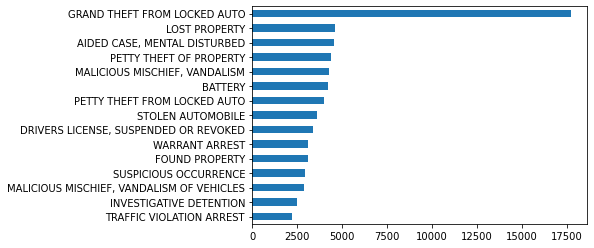

In [12]:
#Which crime often most
df3.crime_description.value_counts().iloc[:15].sort_values().plot(kind= 'barh')

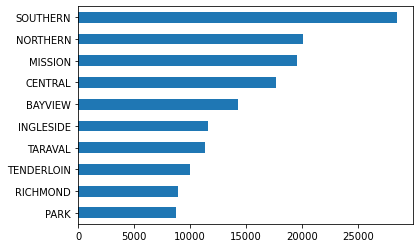

In [13]:
#Graphically most happend crime district 
df3.department_district.value_counts().iloc[:15].sort_values().plot(kind= 'barh')

In [14]:
#Most happend crime district
df3.groupby('department_district').size().sort_values(ascending = False)

department_district
SOUTHERN      28440
NORTHERN      20099
MISSION       19501
CENTRAL       17663
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11323
TENDERLOIN     9942
RICHMOND       8922
PARK           8698
dtype: int64

In [15]:
df3.columns

Index(['incident_id', 'category', 'crime_description', 'crime_date',
       'department_district', 'resolution', 'address', 'department_id',
       'location'],
      dtype='object')

In [16]:
#"crime_date" column spliting into Date & Time
df3[['Date','Time']] = df3.crime_date.str.split(" ",expand=True,)
df3.head()

C:\Users\rohit\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,Date,Time
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,29/01/2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)",29/01/2016,11:00
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",29/01/2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)",29/01/2016,11:00
2,141059263,WARRANTS,WARRANT ARREST,25/04/2016 14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,1.410590e+13,"(37.7299809672996, -122.388856204292)",25/04/2016,14:59
3,160013662,NON-CRIMINAL,LOST PROPERTY,05/01/2016 23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,1.600140e+13,"(37.7857883766888, -122.412970537591)",05/01/2016,23:50
4,160002740,NON-CRIMINAL,LOST PROPERTY,01/01/2016 00:30,MISSION,NONE,16TH ST / MISSION ST,1.600030e+13,"(37.7650501214668, -122.419671780296)",01/01/2016,00:30


In [17]:
df3.columns

Index(['incident_id', 'category', 'crime_description', 'crime_date',
       'department_district', 'resolution', 'address', 'department_id',
       'location', 'Date', 'Time'],
      dtype='object')

In [18]:
#Date column splitting into Month & Year
df3['Month'] = pd.DatetimeIndex(df3['Date']).month
df3['Year'] = pd.DatetimeIndex(df3['Date']).year
df3.head()

<ipython-input-18-1fd3b33a3df5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Month'] = pd.DatetimeIndex(df3['Date']).month
<ipython-input-18-1fd3b33a3df5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year'] = pd.DatetimeIndex(df3['Date']).year


,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,Date,Time,Month,Year
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,29/01/2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)",29/01/2016,11:00,1,2016
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",29/01/2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)",29/01/2016,11:00,1,2016
2,141059263,WARRANTS,WARRANT ARREST,25/04/2016 14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,1.410590e+13,"(37.7299809672996, -122.388856204292)",25/04/2016,14:59,4,2016
3,160013662,NON-CRIMINAL,LOST PROPERTY,05/01/2016 23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,1.600140e+13,"(37.7857883766888, -122.412970537591)",05/01/2016,23:50,5,2016
4,160002740,NON-CRIMINAL,LOST PROPERTY,01/01/2016 00:30,MISSION,NONE,16TH ST / MISSION ST,1.600030e+13,"(37.7650501214668, -122.419671780296)",01/01/2016,00:30,1,2016


In [19]:
df3.columns

Index(['incident_id', 'category', 'crime_description', 'crime_date',
       'department_district', 'resolution', 'address', 'department_id',
       'location', 'Date', 'Time', 'Month', 'Year'],
      dtype='object')

In [20]:
df4 = df3.drop(columns="crime_date")
df4.columns

Index(['incident_id', 'category', 'crime_description', 'department_district',
       'resolution', 'address', 'department_id', 'location', 'Date', 'Time',
       'Month', 'Year'],
      dtype='object')

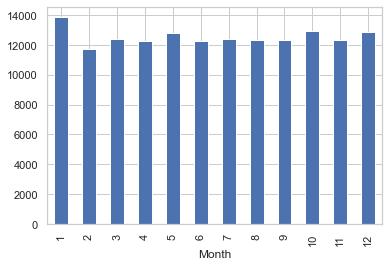

In [30]:
#Most crimes often in which month in 2016
df4.groupby('Month').size().plot(kind = 'bar')

In [31]:
from datetime import datetime

In [32]:
#Splitting Time column into Hour & Minute
df3[['Hour','Minute']] = df3.Time.str.split(":",expand=True,)
df3.head()

C:\Users\rohit\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,Date,Time,Month,Year,Hour,Minute
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,29/01/2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)",29/01/2016,11:00,1,2016,11,00
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",29/01/2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)",29/01/2016,11:00,1,2016,11,00
2,141059263,WARRANTS,WARRANT ARREST,25/04/2016 14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,1.410590e+13,"(37.7299809672996, -122.388856204292)",25/04/2016,14:59,4,2016,14,59
3,160013662,NON-CRIMINAL,LOST PROPERTY,05/01/2016 23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,1.600140e+13,"(37.7857883766888, -122.412970537591)",05/01/2016,23:50,5,2016,23,50
4,160002740,NON-CRIMINAL,LOST PROPERTY,01/01/2016 00:30,MISSION,NONE,16TH ST / MISSION ST,1.600030e+13,"(37.7650501214668, -122.419671780296)",01/01/2016,00:30,1,2016,00,30


In [33]:
df3.columns

Index(['incident_id', 'category', 'crime_description', 'crime_date',
       'department_district', 'resolution', 'address', 'department_id',
       'location', 'Date', 'Time', 'Month', 'Year', 'Hour', 'Minute'],
      dtype='object')

In [34]:
df4 = df3.drop(columns='crime_date')
df4.head()

,incident_id,category,crime_description,department_district,resolution,address,department_id,location,Date,Time,Month,Year,Hour,Minute
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)",29/01/2016,11:00,1,2016,11,00
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)",29/01/2016,11:00,1,2016,11,00
2,141059263,WARRANTS,WARRANT ARREST,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,1.410590e+13,"(37.7299809672996, -122.388856204292)",25/04/2016,14:59,4,2016,14,59
3,160013662,NON-CRIMINAL,LOST PROPERTY,TENDERLOIN,NONE,JONES ST / OFARRELL ST,1.600140e+13,"(37.7857883766888, -122.412970537591)",05/01/2016,23:50,5,2016,23,50
4,160002740,NON-CRIMINAL,LOST PROPERTY,MISSION,NONE,16TH ST / MISSION ST,1.600030e+13,"(37.7650501214668, -122.419671780296)",01/01/2016,00:30,1,2016,00,30


In [35]:
df5 = df4.drop(columns='Minute')
df5.head()

,incident_id,category,crime_description,department_district,resolution,address,department_id,location,Date,Time,Month,Year,Hour
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)",29/01/2016,11:00,1,2016,11
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)",29/01/2016,11:00,1,2016,11
2,141059263,WARRANTS,WARRANT ARREST,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,1.410590e+13,"(37.7299809672996, -122.388856204292)",25/04/2016,14:59,4,2016,14
3,160013662,NON-CRIMINAL,LOST PROPERTY,TENDERLOIN,NONE,JONES ST / OFARRELL ST,1.600140e+13,"(37.7857883766888, -122.412970537591)",05/01/2016,23:50,5,2016,23
4,160002740,NON-CRIMINAL,LOST PROPERTY,MISSION,NONE,16TH ST / MISSION ST,1.600030e+13,"(37.7650501214668, -122.419671780296)",01/01/2016,00:30,1,2016,00


In [36]:
df5.columns

Index(['incident_id', 'category', 'crime_description', 'department_district',
       'resolution', 'address', 'department_id', 'location', 'Date', 'Time',
       'Month', 'Year', 'Hour'],
      dtype='object')

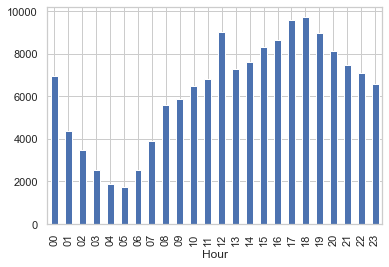

In [37]:
#Most crimes often in which hour
df5.groupby('Hour').size().plot(kind= 'bar') 

In [38]:
#Monthwise hourly crimes often
df5[df5.Year == 2016].groupby(['Month','Hour']).size()

Month  Hour
1      00      902
       01      399
       02      373
       03      198
       04      183
              ... 
12     19      825
       20      702
       21      608
       22      624
       23      624
Length: 288, dtype: int64

In [39]:
df5[df5.Year==2016].groupby(['Month','Hour']).size().unstack(0)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Hour,,,,,,,,,,,,
00,902,549,612,517,561,472,513,555,547,620,551,541
01,399,381,340,354,351,328,355,388,344,443,323,353
02,373,261,235,285,329,268,237,274,291,337,298,306
03,198,200,251,194,212,189,199,217,219,218,248,208
04,183,125,166,160,143,151,174,150,155,158,177,143
05,174,130,155,128,124,162,155,169,151,157,114,125
06,230,188,165,193,204,222,225,211,220,204,216,240
07,298,274,312,315,352,304,327,357,316,374,350,315
08,492,418,496,467,463,497,397,467,441,515,488,434


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF6C114A00>,
      dtype=object)

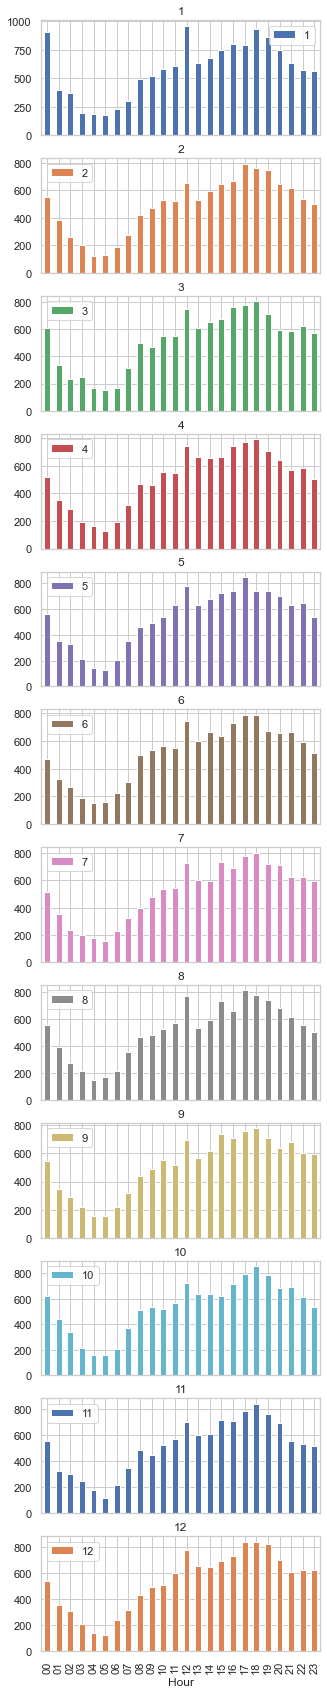

In [40]:
#Graphical design of monthwise hourly crime often
df5[df5.Year==2016].groupby(['Month','Hour']).size().unstack(0).plot(subplots=True, kind = 'bar', figsize = (5, 30))

In [41]:
df5.columns

Index(['incident_id', 'category', 'crime_description', 'department_district',
       'resolution', 'address', 'department_id', 'location', 'Date', 'Time',
       'Month', 'Year', 'Hour'],
      dtype='object')

In [42]:
df5.groupby('crime_description')['crime_description'].agg('count')

crime_description
ABANDONMENT OF CHILD                                         3
ABORTION                                                     2
ACCESS CARD INFORMATION, PUBLICATION OF                      1
ACCESS CARD INFORMATION, THEFT OF                          112
ACTS AGAINST PUBLIC TRANSIT                                 22
                                                          ... 
WEAPON, POSSESS OR BRING OTHER ON SCHOOL GROUNDS            20
WEAPON, POSSESSING IN PUBLIC BUILDING OR OPEN MEETING        1
WEAPON, TAKING OR ATTEMPTING TO TAKE FROM PEACE OFFICER      2
WEARING MASK OR DISGUISE FOR UNLAWFUL PURPOSE                2
WILLFUL CRUELTY TO CHILD                                    17
Name: crime_description, Length: 726, dtype: int64

In [43]:
crime_count = pd.DataFrame(df5.groupby('crime_description').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count.head(40)

,crime_description,counts
0,GRAND THEFT FROM LOCKED AUTO,17740
1,LOST PROPERTY,4596
2,"AIDED CASE, MENTAL DISTURBED",4566
3,PETTY THEFT OF PROPERTY,4414
4,"MALICIOUS MISCHIEF, VANDALISM",4262
5,BATTERY,4211
6,PETTY THEFT FROM LOCKED AUTO,3991
7,STOLEN AUTOMOBILE,3603
8,"DRIVERS LICENSE, SUSPENDED OR REVOKED",3376
9,WARRANT ARREST,3089
